In [12]:
fd_train = pd.read_csv("data/Train.csv")
fd_train

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


DATOP - Date of flight
FLTID - Flight number
DEPSTN - Departure point
ARRSTN - Arrival point
STD - Scheduled Time departure
STA - Scheduled Time arrival
STATUS - Flight status
ETD - Expected Time departure
ETA - Expected Time arrival
ATD - Actual Time of Departure
ATA - Actual Time of arrival
DELAY1 - Delay code 1
DUR1 - delay time 1
DELAY2 - Delay code 2
DUR2 - delay time 2
DELAY3 - Delay code 3
DUR3 - delay time 3
DELAY4 - Delay code 4
DUR4 - delay time 4
AC - Aircraft Code

ATA: Actual Time of Arrival (flight has arrived)
DEP: Departed (flight has left the departure point)
RTR: Returned (flight returned to origin after departure)
SCH: Scheduled (flight is scheduled, not yet departed)
DEL: Delayed (flight is delayed)

In [14]:
columns = ['id', 'date', 'flight_id', 'departure_point', 'arrival_point', 'departure_time', 'arrival_time', 'flight_status', 'aircraft_code', 'target']
fd_train.columns = columns

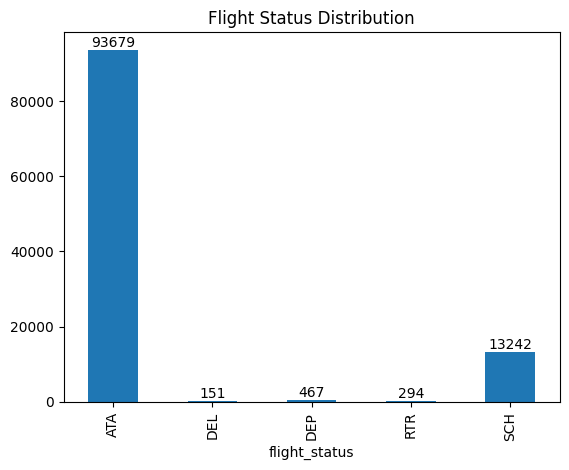

In [19]:
import matplotlib.pyplot as plt

ax = fd_train.groupby("flight_status").size().plot(kind='bar', title='Flight Status Distribution')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
plt.show()

In [39]:
import pandas as pd

fd_train['departure_time'] = pd.to_datetime(fd_train['departure_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
fd_train['arrival_time'] = pd.to_datetime(fd_train['arrival_time'], format='%Y-%m-%d %H.%M.%S', errors='coerce')

In [40]:
fd_train['duration'] = (pd.to_datetime(fd_train['arrival_time']) - pd.to_datetime(fd_train['departure_time'])).dt.total_seconds()

In [131]:
fd_test = pd.read_csv("data/Test.csv")
fd_test

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ
...,...,...,...,...,...,...,...,...,...
9328,test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV
9329,test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG
9330,test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA
9331,test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD


In [118]:
final_df = fd_train[fd_train["duration"] < 68400]

<Axes: >

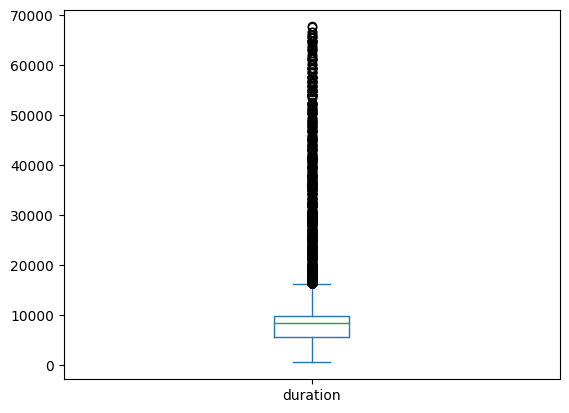

In [119]:
final_df['duration'].plot(kind='box', showfliers=True)

In [121]:
num_col = ['duration']
cat_col = ['departure_point', 'arrival_point', 'flight_status', 'aircraft_code']

In [122]:
dummies = pd.get_dummies(final_df[cat_col], drop_first=True)

In [101]:
dummies

,departure_point_AAL,departure_point_ABJ,departure_point_ADB,departure_point_AHU,departure_point_ALG,departure_point_AMM,departure_point_AMS,departure_point_ARN,departure_point_ATH,departure_point_AYT,...,aircraft_code_TU CR9ISA,aircraft_code_TU CR9XXX,aircraft_code_UG AT7AT7,aircraft_code_UG AT7LBD,aircraft_code_UG AT7LBE,aircraft_code_UG CR9CR9,aircraft_code_UG CR9ISA,aircraft_code_UG CR9XXX,aircraft_code_UJ 320TCF,aircraft_code_X9 320VEB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
107829,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
107830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
107831,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [123]:
final_df = final_df.join(dummies)

In [124]:
y = final_df['target']
X = final_df.drop(columns=['id', 'date', 'flight_id', 'departure_time', 'arrival_time', 'target'] + cat_col)


In [133]:
X.head()

,duration,departure_point_AAL,departure_point_ABJ,departure_point_ADB,departure_point_AHU,departure_point_ALG,departure_point_AMM,departure_point_AMS,departure_point_ARN,departure_point_ATH,...,aircraft_code_TU CR9ISA,aircraft_code_TU CR9XXX,aircraft_code_UG AT7AT7,aircraft_code_UG AT7LBD,aircraft_code_UG AT7LBE,aircraft_code_UG CR9CR9,aircraft_code_UG CR9ISA,aircraft_code_UG CR9XXX,aircraft_code_UJ 320TCF,aircraft_code_X9 320VEB
0,8700.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6600.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9300.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10200.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4800.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
import sklearn.dummy as dummyregression
base_model = dummyregression.DummyRegressor(strategy='mean')

base_model.fit(X_train, y_train)

DummyRegressor()

In [137]:
y_pred = base_model.predict(X_test)

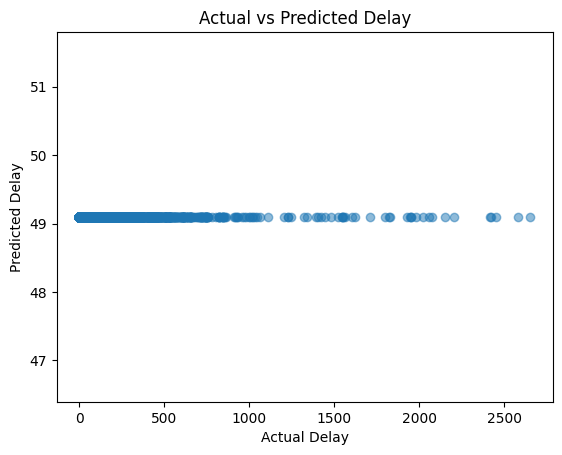

Root Mean Squared Error: 118.05
R2 Score: -0.00


In [140]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Visualize predictions vs actual
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Delay')
plt.ylabel('Predicted Delay')
plt.title('Actual vs Predicted Delay')
plt.show()

# Print model scores
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

In [138]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy: {:2f}'.format(accuracy))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

<Axes: xlabel='target', ylabel='Density'>

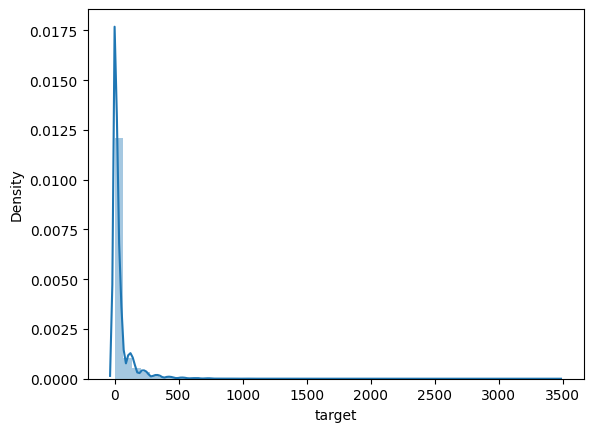

In [61]:
import seaborn as sns
sns.distplot(fd_train['target'], kde=True)

In [25]:
fd_train_positive['target_boxcox']

0         3.867897
1         2.448426
4         2.510757
5         3.048307
6         1.969299
            ...   
107447    1.804929
107495    2.448426
107528    2.255179
107592    2.510757
107675    2.207669
Name: target_boxcox, Length: 69665, dtype: float64

In [16]:
fd_train['flight_status'].unique()

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

In [62]:
import numpy as np
from scipy.stats import boxcox

fd_train['target_bc'] = np.where(
    fd_train['target'] == 0,
    0,
    boxcox(fd_train['target'][fd_train['target'] > 0])[0]
)

ValueError: operands could not be broadcast together with shapes (107833,) () (69665,) 